##  WiFi location - final script

### Last update: 9/23/19
### File: C:\Users\megan\OneDrive\Data_Analytics\WiFi-locationing
### Project Name: WiFi Locationing Re-visited with Python

In [5]:
#Import libraries and modules

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# machine learning
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

pd.options.display.max_columns = 30

In [4]:
#import data

#load train/existing data (dataset1)
training = pd.read_csv('trainingData.csv')

#load predict/new data (dataset2)
validation = pd.read_csv('validationData.csv')

### Data Exploration & Pre-Processing

In [4]:
training.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [5]:
validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,...,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,...,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,...,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,...,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


SpaceID and RelativePosition are blank for validation set. Can use to validate Floor and Building on Final model.

In [6]:
#check for missing data
print(training.isnull().values.any())

False


In [7]:
training.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,74.144606,73.899182,82.795606,82.959372,90.617144,...,99.436525,73.705673,59.889803,99.788634,99.970507,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,62.182586,62.442166,52.005624,51.803007,40.711249,...,10.259137,62.278292,74.060259,6.360671,2.404232,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,-101.000000,-101.000000,-98.000000,-98.000000,-101.000000,...,-97.000000,-101.000000,-101.000000,-97.000000,-97.000000,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


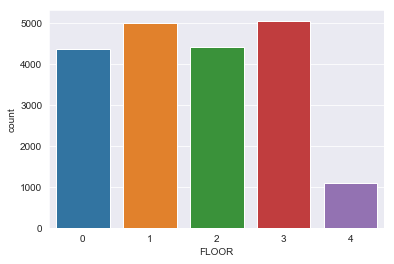

In [7]:
#check how many instances per building, floor, SPACEID
sns.set_style('darkgrid')
sns.countplot('FLOOR',data=training)
plt.show()

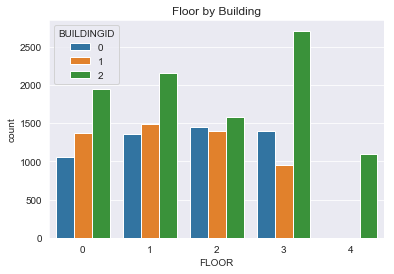

In [8]:
sns.countplot(x='FLOOR',hue='BUILDINGID',data=training)
plt.title("Floor by Building")
plt.show()

Only building 2 has a fifth floor.

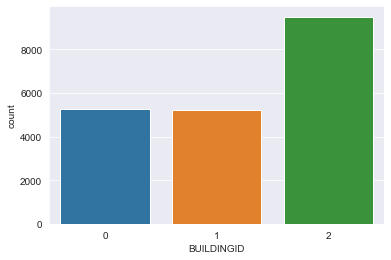

In [10]:
sns.countplot('BUILDINGID',data=training)
plt.show()

Building 2 has the most data, may want to use subset of just building 2 for training

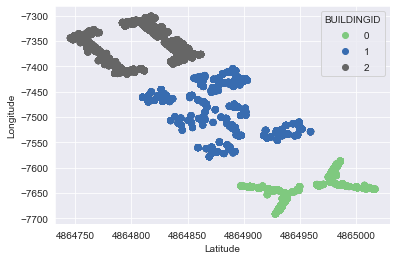

In [11]:
#visualize latitude/longitude data
scatter = plt.scatter('LATITUDE','LONGITUDE',c='BUILDINGID',label='BUILDINGID',cmap='Accent',data=training)
legend = plt.legend(*scatter.legend_elements(),title='BUILDINGID')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

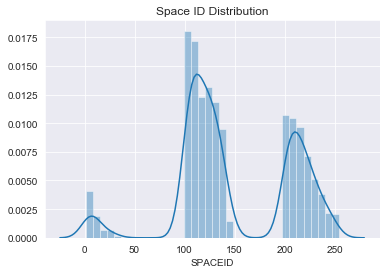

In [10]:
sns.distplot(training['SPACEID'])
plt.title("Space ID Distribution")
plt.show()

SPACEID is not a continuous distribution.

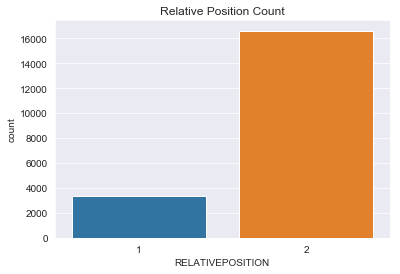

In [9]:
ax = plt.subplot()
fig = sns.countplot(training['RELATIVEPOSITION'])
plt.title("Relative Position Count")
plt.show()

Majority of observations are position 2, which means outside in front of the door to a specific room.

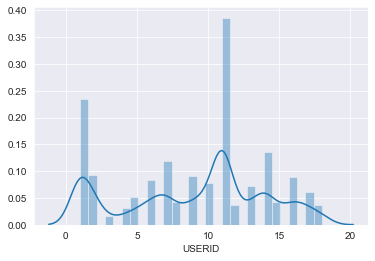

In [14]:
#let's see if USERID (user height measurement) seems useful
sns.distplot(training['USERID'])
plt.show()

In [15]:
training['USERID'].nunique()

18

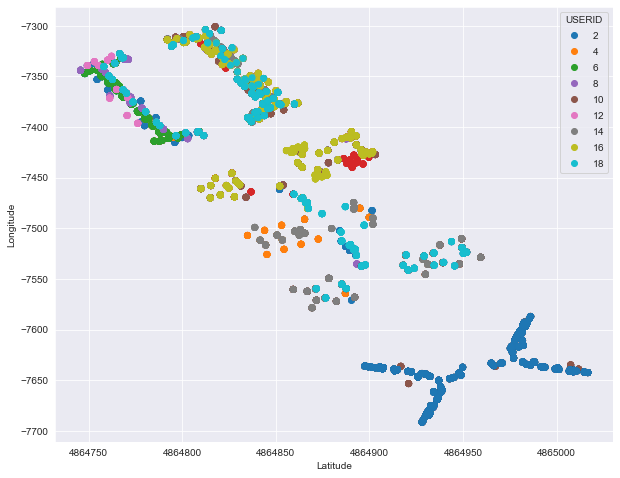

In [16]:
plt.figure(figsize=(10,8))
scatter = plt.scatter('LATITUDE','LONGITUDE',c='USERID',label='USERID',cmap='tab10',data=training)
legend = plt.legend(*scatter.legend_elements(),title='USERID')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

While the values themselves for USERID don't seem useful, it is interesting to note that not all users visited all locations.

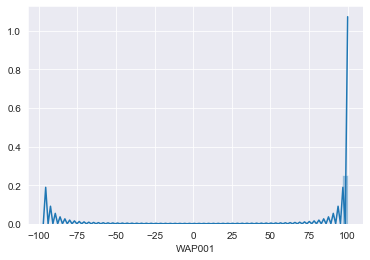

In [17]:
#visualize a few WAP distributions
sns.distplot(training['WAP001'])
plt.show()

Note that +100 means WAP was not detected, and -104 is the strongest signal.

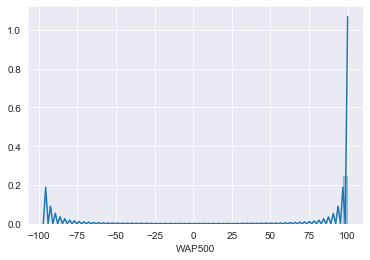

In [18]:
sns.distplot(training['WAP500'])
plt.show()

In [19]:
training['WAP001'].value_counts()

 100    19919
-96         8
-94         4
-95         3
-97         2
-93         1
Name: WAP001, dtype: int64

In [20]:
training['WAP002'].value_counts()

 100    19918
-86        10
-90         9
Name: WAP002, dtype: int64

Based on prior analysis (separate script), SPACEID has poor accuracy when the dv includes all location features. Let's test new method by splitting out SPACEID from LOCATION as a separate dv. This means two models will be needed and greatly increase the complexity, but we can at least see if it improves accuracy.

In [21]:
training_v1 = training.copy()
training_v1['LOCATION'] = training_v1['RELATIVEPOSITION'].astype(str)+'_'\
    +training_v1['BUILDINGID'].astype(str)+'_'+training_v1['FLOOR'].astype(str)

In [243]:
validation_v1 = validation.copy()

In [22]:
training_v1.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,LOCATION
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,2_1_2
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,2_1_2
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,...,100,100,100,100,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,2_1_2
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,2_1_2
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,2_0_0


In [23]:
#remove now redundant features and other unnecessary features
training_v1.drop(['RELATIVEPOSITION','FLOOR','BUILDINGID','TIMESTAMP','PHONEID','LATITUDE','LONGITUDE','USERID'],axis=1,inplace=True)

In [25]:
training_v1['LOCATION'].nunique()

24

In [26]:
training_v1['SPACEID'].nunique()

123

In [27]:
training_v1['LOCATION'].value_counts()

2_2_3    2408
2_2_1    1601
2_2_0    1455
2_0_2    1424
2_0_3    1391
2_0_1    1346
2_2_2    1283
2_2_4    1082
2_0_0    1059
2_1_2     983
2_1_1     925
2_1_0     882
2_1_3     769
1_2_1     561
1_1_1     559
1_2_0     487
1_1_0     486
1_1_2     413
1_2_3     301
1_2_2     294
1_1_3     179
1_2_4      20
1_0_2      19
1_0_1      10
Name: LOCATION, dtype: int64

In [28]:
training_v1['SPACEID'].value_counts()

202    484
106    475
107    469
104    439
101    418
201    418
102    418
103    415
108    385
105    366
203    348
110    334
122    318
111    318
112    318
140    308
126    296
129    296
128    293
109    291
113    289
206    288
121    275
125    265
127    264
120    263
118    261
117    261
124    260
119    258
      ... 
16      42
245     40
246     40
239     40
232     39
13      39
7       38
15      30
242     30
249     30
17      24
30      22
26      22
250     20
240     20
144     20
12      20
146     20
29      20
253     20
147     20
18      19
25      19
28      17
11      17
27      17
14      12
142     10
22      10
254     10
Name: SPACEID, Length: 123, dtype: int64

### Feature Selection & Engineering

#### Filtering

In [29]:
#make new data set with just features
features_v1 = training_v1.iloc[:,0:520]
features_v1.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


In [245]:
validation_features = validation.iloc[:,0:520]

In [246]:
validation_features.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


In [165]:
#new dependent variables for separate models based on location and spaceID
y_v1 = training_v1['LOCATION']
y_v1_space = training_v1['SPACEID']

In [31]:
y_v1.head()

0    2_1_2
1    2_1_2
2    2_1_2
3    2_1_2
4    2_0_0
Name: LOCATION, dtype: object

In [166]:
y_v1_space.head()

0    106
1    106
2    103
3    102
4    122
Name: SPACEID, dtype: int64

In [119]:
#check for variables with zero and near zero variance
selector = VarianceThreshold(0.02) #check for features where 98% of the value or more are the same
selector.fit(features)

VarianceThreshold(threshold=0.02)

In [120]:
selector_columns = [column for column in features.columns if column not in features.columns[selector.get_support()]]

print('There are a total of ',str(len(selector_columns)),' zero variance features')

There are a total of  55  zero variance features


In [121]:
print(selector_columns)

['WAP003', 'WAP004', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP152', 'WAP158', 'WAP159', 'WAP160', 'WAP215', 'WAP217', 'WAP226', 'WAP227', 'WAP238', 'WAP239', 'WAP240', 'WAP241', 'WAP242', 'WAP243', 'WAP244', 'WAP245', 'WAP246', 'WAP247', 'WAP254', 'WAP293', 'WAP296', 'WAP301', 'WAP303', 'WAP304', 'WAP307', 'WAP333', 'WAP349', 'WAP353', 'WAP360', 'WAP365', 'WAP416', 'WAP419', 'WAP423', 'WAP429', 'WAP433', 'WAP438', 'WAP441', 'WAP442', 'WAP444', 'WAP445', 'WAP451', 'WAP458', 'WAP482', 'WAP485', 'WAP487', 'WAP488', 'WAP491', 'WAP497', 'WAP520']


In [122]:
features_NZV_v1 = selector.transform(features_v1)
#note this is a nparray

In [123]:
features_NZV_v1.shape

(19937, 465)

#### RFE

RFE using two separate dep variables

In [167]:
#take 30% sample of data
training_30p_v1 = training_v1.sample(frac=0.3,random_state=998)

In [168]:
len(training_30p_v1)

5981

In [169]:
features_30p_v1 = training_30p_v1.iloc[:,0:520]
features_30p_v1.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
19106,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,-67,100,100,100,100
10067,100,100,100,100,100,100,100,-62,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
7254,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
13805,100,100,100,100,100,100,100,100,100,100,-59,-58,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3182,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


In [170]:
y_30p_v1 = training_30p_v1['LOCATION']
print(len(y_30p_v1))
print(len(features_30p_v1))

5981
5981


In [171]:
cols_v1 = list(features_30p_v1.columns)

#use random forest for RFE
model_v1 = RandomForestClassifier(n_estimators=10)
rfe_v1 = RFE(model_v1)

X_rfe_v1 = rfe_v1.fit_transform(features_30p_v1,y_30p_v1)

#Fitting the data to model
model_v1.fit(X_rfe_v1,y_30p_v1)

temp = pd.Series(rfe_v1.support_,index = cols_v1)

selected_features_rfe_v1 = temp[temp==True].index

In [172]:
print('There are a total of ',len(selected_features_rfe_v1),' selected features using RFE.')

There are a total of  260  selected features using RFE.


In [173]:
#create new df with only selected columns
features_RFE_v1 = pd.DataFrame(features_v1[selected_features_rfe_v1])

In [174]:
features_RFE_v1.head()

,WAP006,WAP007,WAP008,WAP009,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP019,WAP020,WAP023,WAP024,WAP025,...,WAP480,WAP481,WAP483,WAP484,WAP486,WAP489,WAP495,WAP496,WAP498,WAP501,WAP502,WAP503,WAP511,WAP516,WAP517
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,100,100,-97,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


Now need to define a new RFE data set for SPACEID only.

In [175]:
y_30p_v1_space = training_30p_v1['SPACEID']
print(len(y_30p_v1_space))
print(len(features_30p_v1))

5981
5981


In [176]:
cols_v1_space = list(features_30p_v1.columns)

#use random forest for RFE
model_v1_space = RandomForestClassifier(n_estimators=10)
rfe_v1_space = RFE(model_v1_space)

X_rfe_v1_space = rfe_v1_space.fit_transform(features_30p_v1,y_30p_v1_space)

#Fitting the data to model
model_v1_space.fit(X_rfe_v1_space,y_30p_v1_space)

temp = pd.Series(rfe_v1_space.support_,index = cols_v1_space)

selected_features_rfe_v1_space = temp[temp==True].index

In [177]:
print(selected_features_rfe_v1 == selected_features_rfe_v1_space)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [178]:
#create new df with only selected columns
features_RFE_v1_space = pd.DataFrame(features_v1[selected_features_rfe_v1_space])

In [179]:
features_RFE_v1_space.head()

,WAP006,WAP007,WAP008,WAP009,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP019,WAP020,WAP023,WAP024,WAP025,...,WAP480,WAP481,WAP483,WAP484,WAP486,WAP489,WAP495,WAP496,WAP501,WAP502,WAP503,WAP508,WAP511,WAP516,WAP517
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
2,100,100,-97,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


#### PCA

In [150]:
#standardize features before applying PCA
features_scaled_v1 = StandardScaler().fit_transform(features_v1)

In [140]:
pca = PCA(n_components=10)

principalComponents = pca.fit_transform(features_scaled_v1)

In [141]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.05429979, 0.0460621 , 0.03210116, 0.02741662, 0.02296565,
       0.02148747, 0.01794735, 0.01658199, 0.01487198, 0.01349374])

The top 10 components still don't explain much of the variance. Change parameters for pca to compile all features that explain 90% of the variance.

In [142]:
pca = PCA(0.9)

principalComponents = pca.fit_transform(features_scaled_v1)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.05429979, 0.0460621 , 0.03210116, 0.02741662, 0.02296566,
       0.02148747, 0.01794735, 0.01658202, 0.01487209, 0.01349385,
       0.01160808, 0.01061029, 0.01057178, 0.00932156, 0.0088832 ,
       0.00837699, 0.00817809, 0.00799282, 0.00790669, 0.00756997,
       0.00747778, 0.00724333, 0.00640356, 0.00629438, 0.00589583,
       0.00581911, 0.00555422, 0.0055169 , 0.00542462, 0.00525663,
       0.00521078, 0.00504909, 0.00466071, 0.00461065, 0.00460024,
       0.00454995, 0.00446049, 0.00438185, 0.00428819, 0.0042345 ,
       0.0041659 , 0.00413246, 0.00412306, 0.00406325, 0.00401924,
       0.00393482, 0.00386351, 0.00382025, 0.00380812, 0.00369541,
       0.00360711, 0.00358032, 0.00353808, 0.00352873, 0.00347299,
       0.00344401, 0.00339234, 0.00337883, 0.00335643, 0.00331585,
       0.00327903, 0.00326092, 0.00319976, 0.00317776, 0.00315939,
       0.00313111, 0.00310673, 0.00306373, 0.00305105, 0.00302089,
       0.00300746, 0.00295865, 0.00292545, 0.00290523, 0.00287

In [143]:
pca.n_components_

257

To get 90% explained variance, we need 257 components. Still better than 523 so let's try it.

In [144]:
features_PCA_v1 = pca.transform(features_v1)
#note this is a np array

In [145]:
type(features_PCA_v1)

numpy.ndarray

In [146]:
features_PCA_v1.shape

(19937, 257)

In [182]:
#save feature data sets
features_v1.to_csv('features_v1.csv',index=False)
np.save('features_scaled_v1',features_scaled_v1)
features_RFE_v1_space.to_csv('features_RFE_v1_space.csv',index=False)
features_RFE_v1.to_csv('features_RFE_v1.csv',index=False)
np.save('features_PCA_v1',features_PCA_v1)
np.save('features_NZV_v1',features_NZV_v1)

In [48]:
#load back data
features_PCA_v1 = np.load('features_PCA_v1.npy')
features_NZV_v1 = np.load('features_NZV_v1.npy')
features_v1 = pd.read_csv('features_v1.csv')
features_scaled_v1 = np.load('features_scaled_v1.npy')
features_RFE_v1_space = pd.read_csv('features_RFE_v1_space.csv')
features_RFE_v1 = pd.read_csv('features_RFE_v1.csv')

In [69]:
features_NZV_v1.shape

(19937, 465)

### Make train/test splits

There are now a total of five data sets to test:
1. "Out of the box" data set with 520 features
2. NZV_v1 data set with 465 features
3. RFE data set with 260 features for LOCATION w/o SPACEID
4. RFE data set with 260 features for SPACEID
4. PCA data set with 257 features

In [183]:
#scale data before modelling- need to do for each feature set
#use scaled data for non-tree type models
sc = StandardScaler()
features_NZV_scaled_v1 = sc.fit_transform(features_NZV_v1)
features_RFE_v1_scaled = sc.fit_transform(features_RFE_v1)
features_RFE_v1_space_scaled = sc.fit_transform(features_RFE_v1_space)
#features_scaled_v1 is "out of the box" scaled data
#features_PCA is already scaled

In [247]:
validation_features_scaled = sc.fit_transform(validation_features)

In [184]:
#save scaled feature data sets
np.save('features_RFE_v1_space_scaled',features_RFE_v1_space_scaled)
np.save('features_RFE_v1_scaled',features_RFE_v1_scaled)
np.save('features_NZV_scaled_v1',features_NZV_scaled_v1)

In [185]:
#train test - out of the box with y_v1
X_train, X_test, y_train, y_test = train_test_split(features_scaled_v1, y_v1, test_size=0.3, random_state=123)

In [186]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13955, 520), (5982, 520), (13955,), (5982,))

In [187]:
#new train/test split using out of the box with y_v1_space
X_train_space, X_test_space, y_train_space, y_test_space = train_test_split(features_scaled_v1, y_v1_space, test_size=0.3, random_state=123)

In [188]:
X_train_space.shape, X_test_space.shape, y_train_space.shape, y_test_space.shape

((13955, 520), (5982, 520), (13955,), (5982,))

In [189]:
#scaled NZV - y_v1
X_train_NZV_v1, X_test_NZV_v1, y_train_NZV_v1, y_test_NZV_v1 = train_test_split(features_NZV_scaled_v1, y_v1, test_size=0.3, random_state=123)

In [190]:
X_train_NZV_v1.shape, X_test_NZV_v1.shape, y_train_NZV_v1.shape, y_test_NZV_v1.shape

((13955, 465), (5982, 465), (13955,), (5982,))

In [191]:
#scaled NZV - y_v1_space
X_train_NZV_space, X_test_NZV_space, y_train_NZV_space, y_test_NZV_space = train_test_split(features_NZV_scaled_v1, y_v1_space, test_size=0.3, random_state=123)

In [192]:
X_train_NZV_space.shape, X_test_NZV_space.shape, y_train_NZV_space.shape, y_test_NZV_space.shape

((13955, 465), (5982, 465), (13955,), (5982,))

In [193]:
#scaled RFE - y_v1
X_train_RFE_v1, X_test_RFE_v1, y_train_RFE_v1, y_test_RFE_v1 = train_test_split(features_RFE_scaled_v1, y_v1, test_size=0.3, random_state=998)

In [194]:
X_train_RFE_v1.shape, X_test_RFE_v1.shape, y_train_RFE_v1.shape, y_test_RFE_v1.shape

((13955, 260), (5982, 260), (13955,), (5982,))

In [195]:
#scaled RFE - y_v1_space
X_train_RFE_space, X_test_RFE_space, y_train_RFE_space, y_test_RFE_space = train_test_split(features_RFE_scaled_v1, y_v1_space, test_size=0.3, random_state=998)

In [197]:
#PCA - y_v1
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(features_PCA_v1, y_v1, test_size=0.3, random_state=998)

In [198]:
X_train_PCA.shape, X_test_PCA.shape, y_train_PCA.shape, y_test_PCA.shape

((13955, 257), (5982, 257), (13955,), (5982,))

In [199]:
#PCA - y_v1_space
X_train_PCA_space, X_test_PCA_space, y_train_PCA_space, y_test_PCA_space = train_test_split(features_PCA_v1, y_v1_space, test_size=0.3, random_state=998)

In [200]:
X_train_PCA_space.shape, X_test_PCA_space.shape, y_train_PCA_space.shape, y_test_PCA_space.shape

((13955, 257), (5982, 257), (13955,), (5982,))

In [201]:
#save data & load back in to avoid having to re-run if kernel shuts down
np.save('X_train_v1.npy',X_train)
np.save('X_train_space.npy',X_train_space)
np.save('X_train_NZV_v1.npy',X_train_NZV_v1)
np.save('X_train_NZV_space.npy',X_train_NZV_space)
np.save('X_train_RFE_v1.npy',X_train_RFE_v1)
np.save('X_train_RFE_space.npy',X_train_RFE_space)
np.save('X_train_PCA.npy',X_train_PCA)
np.save('X_train_PCA_space.npy',X_train_PCA_space)

np.save('X_test_v1.npy',X_test)
np.save('X_test_space.npy',X_test_space)
np.save('X_test_NZV_v1.npy',X_test_NZV_v1)
np.save('X_test_NZV_space.npy',X_test_NZV_space)
np.save('X_test_RFE_v1.npy',X_test_RFE_v1)
np.save('X_test_RFE_space.npy',X_test_RFE_space)
np.save('X_test_PCA.npy',X_test_PCA)
np.save('X_test_PCA_space.npy',X_test_PCA_space)

np.save('y_train_v1.npy',y_train)
np.save('y_train_space.npy',y_train_space)
np.save('y_train_NZV_v1.npy',y_train_NZV_v1)
np.save('y_train_NZV_space.npy',y_train_NZV_space)
np.save('y_train_RFE_v1.npy',y_train_RFE_v1)
np.save('y_train_RFE_space.npy',y_train_RFE_space)
np.save('y_train_PCA.npy',y_train_PCA)
np.save('y_train_PCA_space.npy',y_train_PCA_space)

np.save('y_test_v1.npy',y_test)
np.save('y_test_space.npy',y_test_space)
np.save('y_test_NZV_v1.npy',y_test_NZV_v1)
np.save('y_test_NZV_space.npy',y_test_NZV_space)
np.save('y_test_RFE_v1.npy',y_test_RFE_v1)
np.save('y_test_RFE_space.npy',y_test_RFE_space)
np.save('y_test_PCA.npy',y_test_PCA)
np.save('y_test_PCA_space.npy',y_test_PCA_space)

In [49]:
#load data
X_train = np.load('X_train_v1.npy')
X_train_space = np.load('X_train_space.npy')
X_train_NZV_v1 = np.load('X_train_NZV_v1.npy')
X_train_NZV_space = np.load('X_train_NZV_space.npy')
X_train_RFE_v1 = np.load('X_train_RFE_v1.npy')
X_train_RFE_space = np.load('X_train_RFE_space.npy')
X_train_PCA = np.load('X_train_PCA.npy',)
X_train_PCA_space = np.load('X_train_PCA_space.npy')

X_test = np.load('X_test_v1.npy')
X_test_space = np.load('X_test_space.npy')
X_test_NZV_v1 = np.load('X_test_NZV_v1.npy')
X_test_NZV_space = np.load('X_test_NZV_space.npy')
X_test_RFE_v1 = np.load('X_test_RFE_v1.npy')
X_test_RFE_space = np.load('X_test_RFE_space.npy')
X_test_PCA = np.load('X_test_PCA.npy')
X_test_PCA_space = np.load('X_test_PCA_space.npy')

y_train = np.load('y_train_v1.npy',allow_pickle=True)
y_train_space= np.load('y_train_space.npy',allow_pickle=True)
y_train_NZV_v1 = np.load('y_train_NZV_v1.npy',allow_pickle=True)
y_train_NZV_space = np.load('y_train_NZV_space.npy',allow_pickle=True)
y_train_RFE_v1 = np.load('y_train_RFE_v1.npy',allow_pickle=True)
y_train_RFE_space = np.load('y_train_RFE_space.npy',allow_pickle=True)
y_train_PCA = np.load('y_train_PCA.npy',allow_pickle=True)
y_train_PCA_space = np.load('y_train_PCA_space.npy',allow_pickle=True)

y_test = np.load('y_test_v1.npy',allow_pickle=True)
y_test_space = np.load('y_test_space.npy',allow_pickle=True)
y_test_NZV_v1= np.load('y_test_NZV_v1.npy',allow_pickle=True)
y_test_NZV_space = np.load('y_test_NZV_space.npy',allow_pickle=True)
y_test_RFE_v1 = np.load('y_test_RFE_v1.npy',allow_pickle=True)
y_test_RFE_space = np.load('y_test_RFE_space.npy',allow_pickle=True)
y_test_PCA = np.load('y_test_PCA.npy',allow_pickle=True)
y_test_PCA_space = np.load('y_test_PCA_space.npy',allow_pickle=True)

### Modeling

#### KNN

In [179]:
#out of the box data - y_v1

#set k_range to try k values from 1 to 10
k_range = range(1,10)

#make a list of each accuracy (defined later) for each k
scores = {}
scores_list = []

#make a list of kappa for each k
kappa = {}
kappa_list = []

#fit data
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(scores[k])
    
    kappa[k] = metrics.cohen_kappa_score(y_test,y_pred)
    kappa_list.append(kappa[k])

print(scores)
print(kappa)

{1: 0.8910063523905049, 2: 0.8664326312270144, 3: 0.8796389167502507, 4: 0.8719491808759612, 5: 0.8716148445336008, 6: 0.8624205951186894, 7: 0.863757940488131, 8: 0.8575727181544633, 9: 0.8564025409562019}
{1: 0.8837314387570575, 2: 0.8578297523942952, 3: 0.8715604072752734, 4: 0.8634674923154109, 5: 0.8629528531427832, 6: 0.8532611762071762, 7: 0.8544918894792222, 8: 0.8479749537362387, 9: 0.8466160988593946}


In [180]:
#find key (k-value) for best accuracy
max_key = max(scores, key=lambda k: scores[k])

print("Best K-value for accuracy:",max_key)
print("Best Accuracy:",max(scores_list))
print("Best Kappa:",kappa[max_key])

Best K-value for accuracy: 1
Best Accuracy: 0.8910063523905049
Best Kappa: 0.8837314387570575


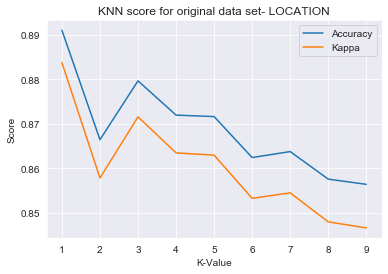

In [185]:
plt.plot(k_range,scores_list)
plt.plot(k_range,kappa_list)
plt.xlabel("K-Value")
plt.ylabel("Score")
plt.legend(["Accuracy","Kappa"])
plt.title("KNN score for original data set- LOCATION")
plt.show()

Accuracy and kappa agree very well. Accuracy is not terrible - we will see if it can improve with different data sets.

In [202]:
#out of the box data - y_v1_space

#set k_range to try k values from 1 to 10
k_range = range(1,10)

#make a list of each accuracy (defined later) for each k
scores_v1_space = {}
scores_v1_space_list = []

#make a list of kappa for each k
kappa_v1_space = {}
kappa_v1_space_list = []

#fit data
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_space,y_train_space)
    
    y_pred_knn_space = knn.predict(X_test_space)
    
    scores_v1_space[k] = metrics.accuracy_score(y_test_space,y_pred_knn_space)
    scores_v1_space_list.append(scores_v1_space[k])
    
    kappa_v1_space[k] = metrics.cohen_kappa_score(y_test_space,y_pred_knn_space)
    kappa_v1_space_list.append(kappa_v1_space[k])

print(scores_v1_space)
print(kappa_v1_space)

{1: 0.6517886994316282, 2: 0.6071547977265128, 3: 0.6074891340688733, 4: 0.6038114343029087, 5: 0.5949515212303578, 6: 0.575058508859913, 7: 0.5678702774991642, 8: 0.5476429287863591, 9: 0.5337679705784019}
{1: 0.6472511805635706, 2: 0.6018224898221527, 3: 0.6021657026570908, 4: 0.5984752223634053, 5: 0.589496313438605, 6: 0.5693412479699025, 7: 0.5620482299305206, 8: 0.541554319480435, 9: 0.5275381559894537}


In [183]:
#find key (k-value) for best accuracy
max_key = max(scores_v1_space, key=lambda k: scores_v1_space[k])

print("Best K-value for accuracy:",max_key)
print("Best Accuracy:",max(scores_v1_space_list))
print("Best Kappa:",kappa_v1_space[max_key])

Best K-value for accuracy: 1
Best Accuracy: 0.6517886994316282
Best Kappa: 0.6472511805635706


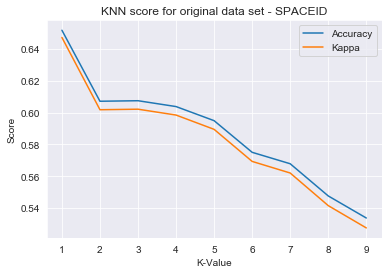

In [184]:
plt.plot(k_range,scores_v1_space_list)
plt.plot(k_range,kappa_v1_space_list)
plt.xlabel("K-Value")
plt.ylabel("Score")
plt.legend(["Accuracy","Kappa"])
plt.title("KNN score for original data set - SPACEID")
plt.show()

In [63]:
#delete variables to save memory
del scores, scores_list, kappa, kappa_list, scores_v1_space, scores_v1_space_list, kappa_v1_space, kappa_v1_space_list

'del scores, scores_list, kappa, kappa_list, scores_v1_space, scores_v1_space_list, kappa_v1_space, kappa_v1_space_list'

#### Random Forest

In [177]:
#original data - y_v1
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split':[2,3,5]}

# create the grid
grid_RF = GridSearchCV(RandomForestClassifier(n_estimators=10), param_grid, cv = 3, scoring='accuracy')

#training
grid_RF.fit(X_train, y_train)

#print best estimator
print(grid_RF.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_RF.best_score_))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 0.7232533142242924


In [203]:
#original data - y_v1_space
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split':[2,3,5]}

# create the grid
grid_RF = GridSearchCV(RandomForestClassifier(n_estimators=10), param_grid, cv = 3, scoring='accuracy')

#training
grid_RF.fit(X_train_space, y_train_space)

#print best estimator
print(grid_RF.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_RF.best_score_))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 0.29093514869222503


In [203]:
#removing most restrictions and adding balanced class_weight

param_grid_3 = {'criterion' : ['gini','entropy']}

# create the grid
grid_RF_2 = GridSearchCV(RandomForestClassifier(n_estimators=100, class_weight='balanced'), param_grid_3, cv = 3, scoring='accuracy')

#training
grid_RF_2.fit(X_train, y_train)

#print best estimator
print(grid_RF_2.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_RF_2.best_score_))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Accuracy: 0.9459691866714439


In [5]:
#save model and make predictions
RF_clf_v1 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

RF_clf_v1.fit(X_train, y_train)

y_pred_RF = RF_clf_v1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))
print("Kappa:",metrics.cohen_kappa_score(y_test, y_pred_RF))

Accuracy: 0.9526914075560013
Kappa: 0.9494780355575603


In [204]:
#y_v1_space

#training
grid_RF_2.fit(X_train_space, y_train_space)

#print best estimator
print(grid_RF_2.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_RF_2.best_score_))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Accuracy: 0.7613041920458617


In [6]:
#save model and make predictions
RF_clf_space = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

RF_clf_space.fit(X_train_space, y_train_space)

y_space_pred_RF = RF_clf_space.predict(X_test_space)

print("Accuracy:",metrics.accuracy_score(y_test_space, y_space_pred_RF))
print("Kappa:",metrics.cohen_kappa_score(y_test_space, y_space_pred_RF))

Accuracy: 0.8025743898361752
Kappa: 0.8000343279863608


In [51]:
#y_v1_space - using different data sets

param_grid_3 = {'criterion' : ['gini','entropy']}

# create the grid
grid_RF_2 = GridSearchCV(RandomForestClassifier(n_estimators=100, class_weight='balanced'), param_grid_3, cv = 3, scoring='accuracy')

#training
grid_RF_2.fit(X_train_NZV_space, y_train_NZV_space)

#print best estimator
print(grid_RF_2.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_RF_2.best_score_))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Accuracy: 0.7590827660336796


In [52]:
#y_v1_space - using different data sets

param_grid_3 = {'criterion' : ['gini','entropy']}

# create the grid
grid_RF_2 = GridSearchCV(RandomForestClassifier(n_estimators=100, class_weight='balanced'), param_grid_3, cv = 3, scoring='accuracy')

#training
grid_RF_2.fit(X_train_RFE_space, y_train_RFE_space)

#print best estimator
print(grid_RF_2.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_RF_2.best_score_))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Accuracy: 0.7615908276603368


In [53]:
#y_v1_space - using different data sets

param_grid_3 = {'criterion' : ['gini','entropy']}

# create the grid
grid_RF_2 = GridSearchCV(RandomForestClassifier(n_estimators=100, class_weight='balanced'), param_grid_3, cv = 3, scoring='accuracy')

#training
grid_RF_2.fit(X_train_PCA_space, y_train_PCA_space)

#print best estimator
print(grid_RF_2.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_RF_2.best_score_))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Accuracy: 0.6355428161949123


#### Decision Tree

In [186]:
#y_v1 - LOCATION
param_grid_2 = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid_2, cv = 3, scoring='accuracy')

#training
grid_tree.fit(X_train, y_train)

#print best estimator
print(grid_tree.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy: 0.5353636689358653


In [188]:
#y_v1_space- SPACEID


#training
grid_tree.fit(X_train_space, y_train_space)

#print best estimator
print(grid_tree.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy: 0.10326048011465425


In [205]:
#y_v1 - LOCATION - removing max restrictions
param_grid_3 = {'criterion' : ['gini','entropy']}

# create the grid
grid_tree_2 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid_3, cv = 3, scoring='accuracy')

#training
grid_tree_2.fit(X_train, y_train)

#print best estimator
print(grid_tree_2.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_tree_2.best_score_))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy: 0.8548190612683626


In [206]:
#y_v1_space

#training
grid_tree_2.fit(X_train_space, y_train_space)

#print best estimator
print(grid_tree_2.best_estimator_)

#with its score
print("Accuracy:",np.abs(grid_tree_2.best_score_))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Accuracy: 0.5383016839842351


#### SVC

In [189]:
#y_v1 - LOCATION
svcModel1 = SVC(kernel='linear', class_weight='balanced', C=1.0)

#training        
svcModel1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [190]:
#predict using model
y_pred_svcModel1 = svcModel1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svcModel1))
print("Kappa:",metrics.cohen_kappa_score(y_test,y_pred_svcModel1))

Accuracy: 0.8239719157472417
Kappa: 0.8129267753108982


In [191]:
#y_v1_space - SPACEID

#training        
svcModel1.fit(X_train_space, y_train_space)

#predict using model
y_pred_svcModel1_space = svcModel1.predict(X_test_space)

print("Accuracy:",metrics.accuracy_score(y_test_space, y_pred_svcModel1_space))
print("Kappa:",metrics.cohen_kappa_score(y_test_space,y_pred_svcModel1_space))

Accuracy: 0.5850885991307255
Kappa: 0.5797578884249982


In [207]:
#y_v1_NZV - LOCATION

#training        
svcModel1.fit(X_train_NZV_v1, y_train_NZV_v1)

#predict using model
y_pred_svcModel1_NZV = svcModel1.predict(X_test_NZV_v1)

print("Accuracy:",metrics.accuracy_score(y_test_NZV_v1, y_pred_svcModel1_NZV))
print("Kappa:",metrics.cohen_kappa_score(y_test_NZV_v1,y_pred_svcModel1_NZV))

Accuracy: 0.8239719157472417
Kappa: 0.8129267753108982


In [208]:
#y_v1_NZV -  SPACEID

#training        
svcModel1.fit(X_train_NZV_space, y_train_NZV_space)

#predict using model
y_pred_svcModel1_NZVs = svcModel1.predict(X_test_NZV_space)

print("Accuracy:",metrics.accuracy_score(y_test_NZV_space, y_pred_svcModel1_NZVs))
print("Kappa:",metrics.cohen_kappa_score(y_test_NZV_space,y_pred_svcModel1_NZVs))

Accuracy: 0.5850885991307255
Kappa: 0.5797578884249982


In [209]:
#y_v1_RFE - LOCATION

#training        
svcModel1.fit(X_train_RFE_v1, y_train_RFE_v1)

#predict using model
y_pred_svcModel1_RFE = svcModel1.predict(X_test_RFE_v1)

print("Accuracy:",metrics.accuracy_score(y_test_RFE_v1, y_pred_svcModel1_RFE))
print("Kappa:",metrics.cohen_kappa_score(y_test_RFE_v1,y_pred_svcModel1_RFE))

Accuracy: 0.8085924439986627
Kappa: 0.7964426296010663


In [210]:
#y_v1_RFE-  SPACEID

#training        
svcModel1.fit(X_train_RFE_space, y_train_RFE_space)

#predict using model
y_pred_svcModel1_RFEs = svcModel1.predict(X_test_RFE_space)

print("Accuracy:",metrics.accuracy_score(y_test_RFE_space, y_pred_svcModel1_RFEs))
print("Kappa:",metrics.cohen_kappa_score(y_test_RFE_space,y_pred_svcModel1_RFEs))

Accuracy: 0.5658642594450016
Kappa: 0.560281355325718


#### Neural Network (Multilayer Perceptron)

In [192]:
#test on data set using default parameters - y_v1
mlpModel1 = MLPClassifier()

#training
mlpModel1.fit(X_train, y_train)

#predict using model
y_pred_mlpModel1= mlpModel1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mlpModel1))
print("Kappa:",metrics.cohen_kappa_score(y_test,y_pred_mlpModel1))

Accuracy: 0.8921765295887663
Kappa: 0.8849790762374514


In [193]:
#using y_v1_space 

#training
mlpModel1.fit(X_train_space, y_train_space)

#predict using model
y_pred_mlpModel1_space = mlpModel1.predict(X_test_space)

print("Accuracy:",metrics.accuracy_score(y_test_space, y_pred_mlpModel1_space))
print("Kappa:",metrics.cohen_kappa_score(y_test_space,y_pred_mlpModel1_space))

Accuracy: 0.5880976262119693
Kappa: 0.5827471389825191


C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [201]:
MLPClassifier().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [202]:
#use gridsearch for y_v1_space since it is not converging with default settings
param_gridMLP = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                 'solver' : ['lbfgs', 'sgd', 'adam']}

clf_MLP = GridSearchCV(MLPClassifier(), param_gridMLP, cv=3, scoring='accuracy')
clf_MLP.fit(X_train_space,y_train_space)


print("Best parameters set found on development set:")
print(clf_MLP.best_params_)

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\megan\AppData\Local\Continuum\a

Best parameters set found on development set:
{'activation': 'relu', 'solver': 'adam'}


C:\Users\megan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



This is likely not a good model for SPACEID, focus on optimizing other models for this variable.

In [196]:
#test on data set using default parameters - NZV data y_v1
mlpModel1 = MLPClassifier()

#training
mlpModel1.fit(X_train_NZV_v1, y_train_NZV_v1)

#predict using model
y_pred_mlpModel1_NZV= mlpModel1.predict(X_test_NZV_v1)

print("Accuracy:",metrics.accuracy_score(y_test_NZV_v1, y_pred_mlpModel1_NZV))
print("Kappa:",metrics.cohen_kappa_score(y_test_NZV_v1,y_pred_mlpModel1_NZV))

Accuracy: 0.8993647609495152
Kappa: 0.8926102005941746


In [196]:
#test on data set using default parameters - NZV data y_v1
mlpModel1 = MLPClassifier()

#training
mlpModel1.fit(X_train_NZV_v1, y_train_NZV_v1)

#predict using model
y_pred_mlpModel1_NZV= mlpModel1.predict(X_test_NZV_v1)

print("Accuracy:",metrics.accuracy_score(y_test_NZV_v1, y_pred_mlpModel1_NZV))
print("Kappa:",metrics.cohen_kappa_score(y_test_NZV_v1,y_pred_mlpModel1_NZV))

Accuracy: 0.8993647609495152
Kappa: 0.8926102005941746


In [65]:
#test on data set using default parameters - NZV data y_v1
mlpModel1 = MLPClassifier()

#training
mlpModel1.fit(X_train_RFE_v1, y_train_RFE_v1)

#predict using model
y_pred_mlpModel1_RFE= mlpModel1.predict(X_test_RFE_v1)

print("Accuracy:",metrics.accuracy_score(y_test_RFE_v1, y_pred_mlpModel1_RFE))
print("Kappa:",metrics.cohen_kappa_score(y_test_RFE_v1,y_pred_mlpModel1_RFE))

Accuracy: 0.9005349381477766
Kappa: 0.8937416672445865


In [64]:
#delete variables to save memory
del y_pred_mlpModel1_space, clf_MLP

'del y_pred_mlpModel1_space, clf_MLP'

### Model Analysis

The best performing model and data set was the "out of the box" data with random forest for both the location and the SPACEID. This had an accuracy close to 95% for location and 76% for SPACEID. When combining location and SPACEID, the best performance when looking at individual components could only correctly identify SPACEID about 3% of the time (separate notebook).

In [55]:
#review metrics for best model and cv score for location
RF_clf_v1 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

RF_clf_v1.fit(X_train, y_train)

y_pred_RF = RF_clf_v1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF))
print("Kappa:",metrics.cohen_kappa_score(y_test, y_pred_RF))
print("Cross-Validation Score:",cross_val_score(RF_clf_v1,X_train,y_train,cv=5))

Accuracy: 0.9530257438983617
Kappa: 0.949832512107092
Cross-Validation Score: [0.95467523 0.94921316 0.94802867 0.95227844 0.94568345]


In [204]:
#use model to predict ALL locations
y_pred_all = RF_clf_v1.predict(features_scaled_v1)
print("Accuracy:",metrics.accuracy_score(y_v1,y_pred_all))

Accuracy: 0.9827958067913929


In [57]:
#review metrics for best model and cv score for SPACEID
RF_clf_space = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


RF_clf_space.fit(X_train_space, y_train_space)

y_space_pred_RF = RF_clf_space.predict(X_test_space)

print("Accuracy:",metrics.accuracy_score(y_test_space, y_space_pred_RF))
print("Cross-Validation Score:",cross_val_score(RF_clf_space,X_train_space,y_train_space,cv=5))

Accuracy: 0.7947174857907054
Cross-Validation Score: [0.77632969 0.79233227 0.79047278 0.7769342  0.7800073 ]


In [205]:
#use model to predict ALL SPACEIDs
y_pred_all_space = RF_clf_space.predict(features_scaled_v1)
print("Accuracy:",metrics.accuracy_score(y_v1_space,y_pred_all_space))

Accuracy: 0.9169885138185284


In [206]:
predictions = pd.DataFrame(y_pred_all,columns=['Predicted Location'])
predictions_space = pd.DataFrame(y_pred_all_space, columns=['Predicted_SPACEID'])

In [207]:
predictions.head()

,Predicted Location
0,2_1_2
1,2_1_2
2,2_1_2
3,2_1_2
4,1_1_3


In [208]:
predictions.tail()

,Predicted Location
19932,2_1_3
19933,2_2_1
19934,2_1_3
19935,2_1_3
19936,2_1_3


In [209]:
predictions_space.head()

,Predicted_SPACEID
0,106
1,106
2,103
3,102
4,6


In [210]:
predictions_space.tail()

,Predicted_SPACEID
19932,1
19933,140
19934,13
19935,113
19936,112


In [211]:
#add new columns separating out each component of predicted location
new = predictions['Predicted Location'].str.split('_',expand=True)

In [212]:
new.head()

,0,1,2
0,2,1,2
1,2,1,2
2,2,1,2
3,2,1,2
4,1,1,3


In [213]:
predictions['Predicted_RelPosition'] = new[0]

In [214]:
predictions['Predicted_Bldg'] = new[1]

In [215]:
predictions['Predicted_Floor'] = new[2]

In [216]:
predictions.head()

,Predicted Location,Predicted_RelPosition,Predicted_Bldg,Predicted_Floor
0,2_1_2,2,1,2
1,2_1_2,2,1,2
2,2_1_2,2,1,2
3,2_1_2,2,1,2
4,1_1_3,1,1,3


In [217]:
predictions.drop(['Predicted Location'],inplace=True,axis=1)

In [218]:
predictions.head()

,Predicted_RelPosition,Predicted_Bldg,Predicted_Floor
0,2,1,2
1,2,1,2
2,2,1,2
3,2,1,2
4,1,1,3


In [219]:
training_all = pd.merge(training,predictions,left_index=True,right_index=True)

In [220]:
training_all = pd.merge(training_all,predictions_space,left_index=True,right_index=True)

In [221]:
training_all.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_RelPosition,Predicted_Bldg,Predicted_Floor,Predicted_SPACEID
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,2,1,2,106
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,2,1,2,106
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,...,100,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,2,1,2,103
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,2,1,2,102
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,1,1,3,6


In [222]:
training_all.dtypes

WAP001                     int64
WAP002                     int64
WAP003                     int64
WAP004                     int64
WAP005                     int64
WAP006                     int64
WAP007                     int64
WAP008                     int64
WAP009                     int64
WAP010                     int64
WAP011                     int64
WAP012                     int64
WAP013                     int64
WAP014                     int64
WAP015                     int64
WAP016                     int64
WAP017                     int64
WAP018                     int64
WAP019                     int64
WAP020                     int64
WAP021                     int64
WAP022                     int64
WAP023                     int64
WAP024                     int64
WAP025                     int64
WAP026                     int64
WAP027                     int64
WAP028                     int64
WAP029                     int64
WAP030                     int64
          

In [223]:
training_all[training_all.select_dtypes(['object']).columns] = training_all.select_dtypes(['object']).apply(lambda x: x.astype('int64'))

In [224]:
#calculate individual component accuracy
get_agreement = lambda x: '1' if x['FLOOR'] == x['Predicted_Floor'] else '0'

In [225]:
training_all['floor_agreement'] = training_all.apply(get_agreement, axis=1)

In [226]:
training_all.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_RelPosition,Predicted_Bldg,Predicted_Floor,Predicted_SPACEID,floor_agreement
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,2,1,2,106,1
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,2,1,2,106,1
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,2,1,2,103,1
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,2,1,2,102,1
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,1,1,3,6,0


In [227]:
get_agreement = lambda x: '1' if x['BUILDINGID'] == x['Predicted_Bldg'] else '0'
training_all['building_agreement'] = training_all.apply(get_agreement, axis=1)
training_all.head(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_RelPosition,Predicted_Bldg,Predicted_Floor,Predicted_SPACEID,floor_agreement,building_agreement
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733,2,1,2,106,1,1
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691,2,1,2,106,1,1
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,...,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095,2,1,2,103,1,1
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807,2,1,2,102,1,1
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710,1,1,3,6,0,0
5,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841,2,1,2,105,1,1
6,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883,2,1,2,103,1,1
7,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775,2,1,2,105,1,1
8,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307,2,1,2,112,1,1
9,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128,1,1,2,103,1,1


In [228]:
get_agreement = lambda x: '1' if x['RELATIVEPOSITION'] == x['Predicted_RelPosition'] else '0'
training_all['position_agreement'] = training_all.apply(get_agreement, axis=1)
training_all.tail(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_RelPosition,Predicted_Bldg,Predicted_Floor,Predicted_SPACEID,floor_agreement,building_agreement,position_agreement
19927,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,4.864835e+06,1,2,141,2,18,10,1371710382,2,2,1,141,1,1,1
19928,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,4.864769e+06,1,2,207,2,18,10,1371710221,2,2,1,207,1,1,1
19929,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-80,...,4.864897e+06,3,1,2,2,18,10,1371710652,2,1,3,2,1,1,1
19930,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-87,...,4.864890e+06,3,1,4,2,18,10,1371710817,2,1,3,4,1,1,1
19931,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,4.864837e+06,1,2,140,1,18,10,1371710420,1,2,1,140,1,1,1
19932,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-75,...,4.864875e+06,3,1,1,2,18,10,1371710683,2,1,3,1,1,1,1
19933,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,4.864836e+06,1,2,140,2,18,10,1371710402,2,2,1,140,1,1,1
19934,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-95,...,4.864889e+06,3,1,13,2,18,10,1371710921,2,1,3,13,1,1,1
19935,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-91,...,4.864896e+06,3,1,113,2,18,10,1371711049,2,1,3,113,1,1,1
19936,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,4.864898e+06,3,1,112,2,18,10,1371711025,2,1,3,112,1,1,1


In [229]:
get_agreement = lambda x: '1' if x['SPACEID'] == x['Predicted_SPACEID'] else '0'
training_all['space_agreement'] = training_all.apply(get_agreement, axis=1)
training_all.tail(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_RelPosition,Predicted_Bldg,Predicted_Floor,Predicted_SPACEID,floor_agreement,building_agreement,position_agreement,space_agreement
19927,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,1,2,141,2,18,10,1371710382,2,2,1,141,1,1,1,1
19928,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,1,2,207,2,18,10,1371710221,2,2,1,207,1,1,1,1
19929,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-80,...,3,1,2,2,18,10,1371710652,2,1,3,2,1,1,1,1
19930,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-87,...,3,1,4,2,18,10,1371710817,2,1,3,4,1,1,1,1
19931,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,1,2,140,1,18,10,1371710420,1,2,1,140,1,1,1,1
19932,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-75,...,3,1,1,2,18,10,1371710683,2,1,3,1,1,1,1,1
19933,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,1,2,140,2,18,10,1371710402,2,2,1,140,1,1,1,1
19934,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-95,...,3,1,13,2,18,10,1371710921,2,1,3,13,1,1,1,1
19935,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-91,...,3,1,113,2,18,10,1371711049,2,1,3,113,1,1,1,1
19936,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,3,1,112,2,18,10,1371711025,2,1,3,112,1,1,1,1


In [230]:
training_all['space_agreement'].value_counts()

1    18282
0     1655
Name: space_agreement, dtype: int64

In [231]:
seriesObj = training_all.apply(lambda x: True if x['building_agreement'] == '1' else False, axis=1)
seriesObj2 = training_all.apply(lambda x: True if x['floor_agreement'] == '1' else False, axis=1)
seriesObj3 = training_all.apply(lambda x: True if x['position_agreement'] == '1' else False, axis=1)
seriesObj4 = training_all.apply(lambda x: True if x['space_agreement'] == '1' else False, axis=1)

# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
numOfRows2 = len(seriesObj2[seriesObj2 == True].index)
numOfRows3 = len(seriesObj3[seriesObj3 == True].index)
numOfRows4 = len(seriesObj4[seriesObj4 == True].index)

 
print('Number of Rows in dataframe in which bldg prediction agrees:', numOfRows)
print('Number of Rows in dataframe in which floor prediction agrees:', numOfRows2)
print('Number of Rows in dataframe in which relative position prediction agrees:', numOfRows3)
print('Number of Rows in dataframe in which spaceID prediction agrees:', numOfRows4)

Number of Rows in dataframe in which bldg prediction agrees: 19898
Number of Rows in dataframe in which floor prediction agrees: 19874
Number of Rows in dataframe in which relative position prediction agrees: 19617
Number of Rows in dataframe in which spaceID prediction agrees: 18282


In [232]:
#calculate accuracy for each component

building_accuracy = numOfRows  / len(training_all['building_agreement'])
floor_accuracy = numOfRows2  / len(training_all['building_agreement'])
position_accuracy = numOfRows3  / len(training_all['building_agreement'])
space_accuracy = numOfRows4  / len(training_all['building_agreement'])

print("Building Accuracy:",building_accuracy)
print("Floor Accuracy:",floor_accuracy)
print("Relative Position Accuracy:",position_accuracy)
print("Space Accuracy:",space_accuracy)

Building Accuracy: 0.9980438380899834
Floor Accuracy: 0.9968400461453579
Relative Position Accuracy: 0.9839494407383257
Space Accuracy: 0.9169885138185284


In [233]:
#visualize prediction accuracy

#make new table for each component & prediction to plot easily - do only for relpos, floor, bldg. too many SPACEID's
new2 = training_all[['FLOOR','Predicted_Floor']]
floor = pd.melt(training_all,value_vars=['FLOOR','Predicted_Floor'],var_name=['Group'])
floor.head()

,Group,value
0,FLOOR,2
1,FLOOR,2
2,FLOOR,2
3,FLOOR,2
4,FLOOR,0


In [234]:
floor.dtypes

Group    object
value     int64
dtype: object

In [235]:
floor['Group'].value_counts()

Predicted_Floor    19937
FLOOR              19937
Name: Group, dtype: int64

In [236]:
floor['value'].value_counts()

3    10140
1     9999
2     8822
0     8710
4     2203
Name: value, dtype: int64

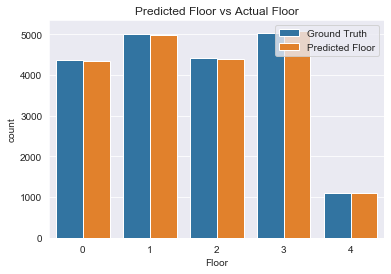

In [237]:
fig = plt.figure()
ax = plt.subplot()
sns.countplot(x='value',hue='Group',data=floor)
ax.set_xlabel('Floor')
ax.set_title('Predicted Floor vs Actual Floor')
ax.legend(['Ground Truth','Predicted Floor'])
plt.savefig("fig.png")
plt.show()

In [238]:
new3 = training_all[['BUILDINGID','Predicted_Bldg']]
bldg = pd.melt(training_all,value_vars=['BUILDINGID','Predicted_Bldg'],var_name=['Group'])
bldg.head()

,Group,value
0,BUILDINGID,1
1,BUILDINGID,1
2,BUILDINGID,1
3,BUILDINGID,1
4,BUILDINGID,0


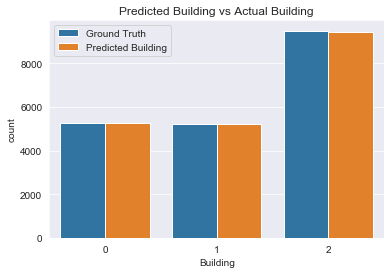

In [239]:
fig2 = plt.figure()
ax2 = plt.subplot()
sns.countplot(x='value',hue='Group',data=bldg)
ax2.set_xlabel('Building')
ax2.set_title('Predicted Building vs Actual Building')
ax2.legend(['Ground Truth','Predicted Building'])
plt.savefig("fig2.png")
plt.show()

In [240]:
new4 = training_all[['RELATIVEPOSITION','Predicted_RelPosition']]
relpos = pd.melt(training_all,value_vars=['RELATIVEPOSITION','Predicted_RelPosition'],var_name=['Group'])
relpos.head()

,Group,value
0,RELATIVEPOSITION,2
1,RELATIVEPOSITION,2
2,RELATIVEPOSITION,2
3,RELATIVEPOSITION,2
4,RELATIVEPOSITION,2


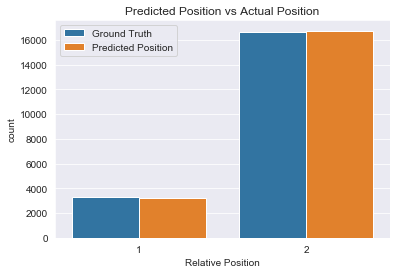

In [241]:
fig3 = plt.figure()
ax3 = plt.subplot()
sns.countplot(x='value',hue='Group',data=relpos)
ax3.set_xlabel('Relative Position')
ax3.set_title('Predicted Position vs Actual Position')
ax3.legend(['Ground Truth','Predicted Position'])
plt.savefig("fig3.png")
plt.show()

### Model Validation

In [256]:
y_pred_validation = RF_clf_v1.predict(validation_features_scaled)

In [257]:
predictions_validation = pd.DataFrame(y_pred_validation,columns=['Predicted Location'])
predictions_validation.head()

,Predicted Location
0,1_1_3
1,2_2_3
2,2_2_4
3,2_2_4
4,2_0_2


In [258]:
#add new columns separating out each component of predicted location
new_valid = predictions_validation['Predicted Location'].str.split('_',expand=True)

In [259]:
new_valid.head()

,0,1,2
0,1,1,3
1,2,2,3
2,2,2,4
3,2,2,4
4,2,0,2


In [260]:
predictions_validation['Predicted_Bldg'] = new_valid[1]
predictions_validation['Predicted_Floor'] = new_valid[2]

In [261]:
predictions_validation.head()

,Predicted Location,Predicted_Bldg,Predicted_Floor
0,1_1_3,1,3
1,2_2_3,2,3
2,2_2_4,2,4
3,2_2_4,2,4
4,2_0_2,0,2


In [262]:
predictions_validation.drop(['Predicted Location'],inplace=True,axis=1)

In [263]:
validation_all = pd.merge(validation,predictions_validation,left_index=True,right_index=True)

In [264]:
validation_all.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_Bldg,Predicted_Floor
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1,3
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,...,100,100,100,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,2,3
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,...,100,100,100,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,2,4
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,...,100,100,100,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,2,4
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,...,100,100,100,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,0,2


In [265]:
validation_all[validation_all.select_dtypes(['object']).columns] = validation_all.select_dtypes(['object']).apply(lambda x: x.astype('int64'))

In [266]:
#calculate individual component accuracy
get_agreement = lambda x: '1' if x['FLOOR'] == x['Predicted_Floor'] else '0'
validation_all['floor_agreement'] = validation_all.apply(get_agreement, axis=1)
validation_all.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_Bldg,Predicted_Floor,floor_agreement
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1,3,0
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,...,100,100,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,2,3,0
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,...,100,100,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,2,4,1
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,...,100,100,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,2,4,1
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,...,100,100,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,0,2,1


In [267]:
get_agreement = lambda x: '1' if x['BUILDINGID'] == x['Predicted_Bldg'] else '0'
validation_all['building_agreement'] = validation_all.apply(get_agreement, axis=1)
validation_all.head(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,...,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Predicted_Bldg,Predicted_Floor,floor_agreement,building_agreement
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1,3,0,1
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,...,100,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,2,3,0,1
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,...,100,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,2,4,1,1
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,...,100,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,2,4,1,1
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,...,100,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,0,2,1,1
5,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853,2,2,1,1
6,100,100,100,100,100,100,100,100,100,100,-53,-53,100,100,100,...,100,100,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982,2,3,1,1
7,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085,2,3,1,1
8,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092,2,3,0,1
9,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118,2,0,1,1


In [270]:
validation_all['building_agreement'].value_counts()

1    1110
0       1
Name: building_agreement, dtype: int64

In [271]:
    validation_all['floor_agreement'].value_counts()

1    869
0    242
Name: floor_agreement, dtype: int64

In [268]:
seriesObj_v = validation_all.apply(lambda x: True if x['building_agreement'] == '1' else False, axis=1)
seriesObj2_v = validation_all.apply(lambda x: True if x['floor_agreement'] == '1' else False, axis=1)

# Count number of True in series
numOfRows_v = len(seriesObj_v[seriesObj_v == True].index)
numOfRows2_v = len(seriesObj2_v[seriesObj2_v == True].index)

 
print('Number of Rows in dataframe in which bldg prediction agrees:', numOfRows_v)
print('Number of Rows in dataframe in which floor prediction agrees:', numOfRows2_v)

Number of Rows in dataframe in which bldg prediction agrees: 1110
Number of Rows in dataframe in which floor prediction agrees: 869


In [272]:
#calculate accuracy for each component

building_accuracy_v = numOfRows_v  / len(validation_all['building_agreement'])
floor_accuracy_v = numOfRows2_v  / len(validation_all['building_agreement'])


print("Building Accuracy:",building_accuracy_v)
print("Floor Accuracy:",floor_accuracy_v)

Building Accuracy: 0.9990999099909991
Floor Accuracy: 0.7821782178217822
